# DKRZ PyNGL example 

Load modules

In [45]:
from __future__ import print_function
from io import StringIO
import numpy as np
import Ngl,Nio

Read ASCII input file  (country; value)

In [46]:
fin     = open('country_gesamt.txt', newline='')
input   = fin.read()
rows    = input.strip('\n')

s       = StringIO(rows)                   #-- in-memory stream for text
data    = np.genfromtxt(s, dtype=['U30','i8'], names=['country','value'], delimiter=';')
                                          #-- genfromtxt 'U' must be used for strings in Python3
states  = list(data['country'])           #-- in contrast to NCL it must be a list
values  = data['value'][:]                #-- data array

Define levels and labels

In [47]:
levels = [1,2,5,10,50,100,200,500,1000,2000]                             #-- value levels
labels = ["1","2",">5",">10",">50",">100",">200",">500",">1000",">2000"] #-- labelbar labels

Define color map (index 0/1: foreground/background

In [48]:
cmap = np.array([[1.0,      1.0,      1.0], \
                 [0.0,      0.0,      0.0], \
                 [0.997785, 0.999139, 0.846059], \
                 [0.910127, 0.964937, 0.695640], \
                 [0.769320, 0.909419, 0.706959], \
                 [0.521292, 0.812964, 0.731073], \
                 [0.304483, 0.732118, 0.761430], \
                 [0.141961, 0.597647, 0.756078], \
                 [0.122107, 0.483137, 0.712711], \
                 [0.131949, 0.382745, 0.665467], \
                 [0.138408, 0.297578, 0.624990], \
                 [0.031373, 0.113725, 0.345098]],'f')
                    
colors  = np.arange(2,len(cmap)+1,1)                #-- array for color indices
nlevels = len(levels)                               #-- number of levels
icols   = np.ones(len(values),int)                  #-- assign array for color indices

#-- set the color indices array
for i in range(0,len(values)):
   if(values[i] == levels[0]):
      icols[i] = 0

   if(values[i] > levels[nlevels-1]):
      icols[i] = len(colors)

   for j in range(0,nlevels-1):
      if(values[i] > levels[j] and values[i] <= levels[j+1]):
         icols[i] = colors[j]

   print("State: %2.2i   IPs:  %4.2i  %s" % (i,values[i],data['country'][i]))

State: 00   IPs:   119  Brazil
State: 01   IPs:   222  Canada
State: 02   IPs:    82  Italy
State: 03   IPs:    12  Czech Republic
State: 04   IPs:    01  Sudan
State: 05   IPs:   190  South Korea
State: 06   IPs:    02  Lithuania
State: 07   IPs:    04  Costa Rica
State: 08   IPs:    02  Luxembourg
State: 09   IPs:   182  France
State: 10   IPs:    07  Ethiopia
State: 11   IPs:    03  Ireland
State: 12   IPs:    37  Argentina
State: 13   IPs:   114  Norway
State: 14   IPs:    03  Nigeria
State: 15   IPs:    01  Bangladesh
State: 16   IPs:    01  Uzbekistan
State: 17   IPs:    09  Saudi Arabia
State: 18   IPs:   192  Australia
State: 19   IPs:   148  Singapore
State: 20   IPs:    05  Cameroon
State: 21   IPs:    01  Kazakhstan
State: 22   IPs:    03  Iran
State: 23   IPs:    08  Senegal
State: 24   IPs:    01  Slovenia
State: 25   IPs:  1230  China
State: 26   IPs:    17  Chile
State: 27   IPs:    74  Russia
State: 28   IPs:    65  Thailand
State: 29   IPs:   951  Germany
State: 30   I

Open graphic output

In [49]:
wks = Ngl.open_wks("png","plot_counts_per_country_map_blue")

Set new color map (overwrite default colormap)

In [50]:
rlist            = Ngl.Resources()
rlist.wkColorMap = cmap
Ngl.set_values(wks,rlist)

-1

Set plot resources

In [51]:
res                       =  Ngl.Resources()  
res.nglMaximize           =  True                   #-- maximize plot
res.nglFrame              =  False                  #-- don't advance the frame yet
 
res.vpXF                  =  0.01                   #-- x-position
res.vpYF                  =  0.95                   #-- y-position
res.vpWidthF              =  0.98                   #-- width
res.vpHeightF             =  0.95                   #-- height
 
res.pmTickMarkDisplayMode = "Always"                #-- turn on map tickmarks
 
res.mpDataSetName         = "Earth..4"              #-- new database
res.mpDataBaseVersion     = "MediumRes"             #-- Medium resolution database
res.mpOutlineOn           =  True                   #-- turn on map outlines
res.mpFillOn              =  True                   #-- turn on map fill
res.mpOutlineBoundarySets = "National"              #-- draw only national bounds
res.mpOceanFillColor      = "white"                 #-- set ocean fill color to white
res.mpLandFillColor       = "white"                 #-- set land fill color to white
res.mpInlandWaterFillColor= "white"                 #-- set inland water fill color to white

res.mpMinLatF             = -60                     #-- don't plot Antarctica
 
res.tmXBLabelFontHeightF  =  0.012                  #-- change XB label font size
res.tmYLLabelFontHeightF  =  0.012                  #-- change YL label font size
res.tmXBMajorLengthF      =  0.008                  #-- change XB the tickmark length
res.tmYLMajorLengthF      =  0.008                  #-- change YL the tickmark length
 
res.tiMainString          = "Counts per country"    #-- title string
res.tiMainFont            = "helvetica"             #-- title string font
res.tiMainFontHeightF     =  0.025                  #-- set title string font size

Use area specifiers and their fill colors

In [52]:
res.mpFillAreaSpecifiers  =  states                 #-- fill listed states
res.mpSpecifiedFillColors =  icols                  #-- use generated color array

Create the map plot

In [53]:
map = Ngl.map(wks,res)

Retrieve viewport settings from map plot for labelbar position

In [54]:
vpx  = Ngl.get_float(map,"vpXF")                    #-- retrieve viewport x-position
vpy  = Ngl.get_float(map,"vpYF")                    #-- retrieve viewport y-position
vpw  = Ngl.get_float(map,"vpWidthF")                #-- retrieve viewport width
vph  = Ngl.get_float(map,"vpHeightF")               #-- retrieve viewport height

lbx, lby = vpx, vpy-vph-0.04

Set labelbar resources

In [55]:
lbres                    =  Ngl.Resources()
lbres.vpWidthF           =  vpw                     #-- width of labelbar
lbres.vpHeightF          =  0.08                    #-- height of labelbar
lbres.lbOrientation      = "horizontal"             #-- labelbar orientation
lbres.lbLabelFontHeightF =  0.012                   #-- labelbar label font size
lbres.lbAutoManage       =  False                   #-- we control label bar
lbres.lbFillColors       =  colors                  #-- box fill colors  
lbres.lbPerimOn          =  False                   #-- turn off labelbar perimeter
lbres.lbMonoFillPattern  =  True                    #-- turn on solid pattern
lbres.lbLabelAlignment   = "BoxCenters"             #-- write labels below box edges

Add the labelbar to the map plot

In [56]:
pid = Ngl.labelbar_ndc(wks, nlevels, labels, lbx, lby, lbres)

Add x-axis title and copyright string

In [57]:
txres               =  Ngl.Resources()
txres.txJust        = "CenterCenter"
txres.txFontHeightF =  0.014

Ngl.text_ndc(wks,"ESGF users",0.5,0.14,txres)

txres.txJust        = "CenterRight"
txres.txFontHeightF =  0.010
Ngl.text_ndc(wks,"~F35~c ~F21~~N~DKRZ",vpx+vpw,0.10,txres)

Advance the frame

In [58]:
Ngl.frame(wks)

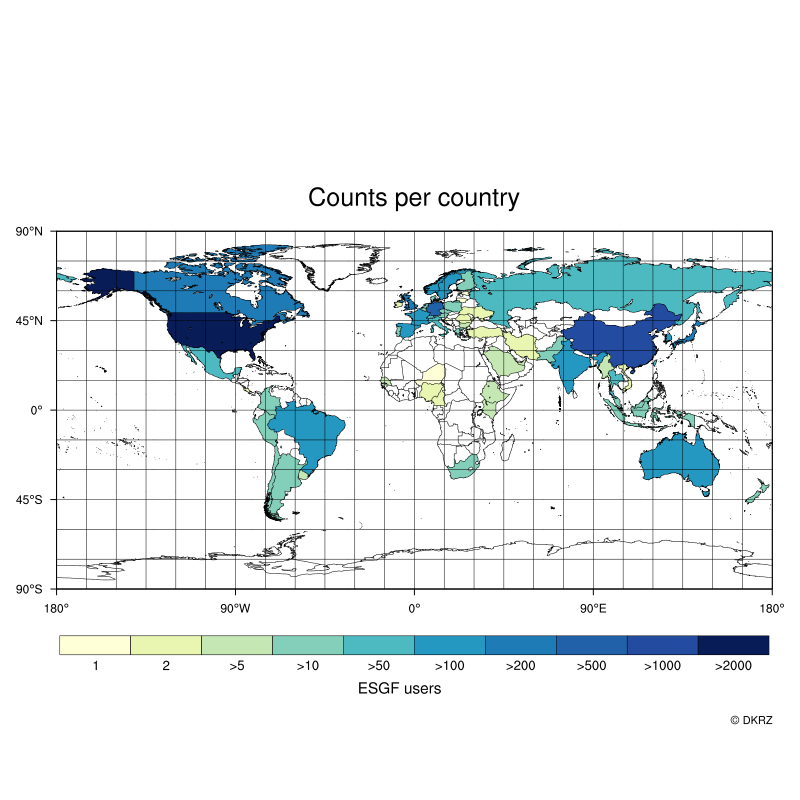

In [59]:
from IPython.display import Image
Image(filename='plot_counts_per_country_map_blue.png')